<h1>ANN for Predicting Student Exam Scores</h1>
<h2>DA221, Introduction to AI : Course Project</h2>
<h2>Team Saphire</h2>
<h2>Samvid Pundir , 230150021 <br><br>
Bhavika Pandya , 230150006 <br><br>


**<h1>LIBRARIES REQUIRED</h1>**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, mean_squared_error,
    mean_absolute_error, r2_score
)

# Deep Learning (Keras/TensorFlow)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Kaggle Models
import kagglehub


**<h1>IMPORTING DATASET FROM KAGGLE</h1>**

In [2]:
import kagglehub

path = kagglehub.dataset_download("dskagglemt/student-performance-data-set")



**<h1>DOWNLOADING DATAFRAMES</h1>**

In [3]:
df1 = pd.read_csv("/kaggle/input/student-performance-data-set/student-mat.csv", sep=';')
df2 = pd.read_csv("/kaggle/input/student-performance-data-set/student-por.csv", sep=';')

**<h1>MERGING THE TWO DATAFRAMES SINCE THEIR COLUMNS ARE SAME(FULL JOIN)</h1>**

In [4]:
if df1.columns.equals(df2.columns):
    combined_df = pd.concat([df1, df2], ignore_index=True)



In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
import warnings
warnings.filterwarnings("ignore")

**<h2>PLOTTING THE GRADES</h2>**

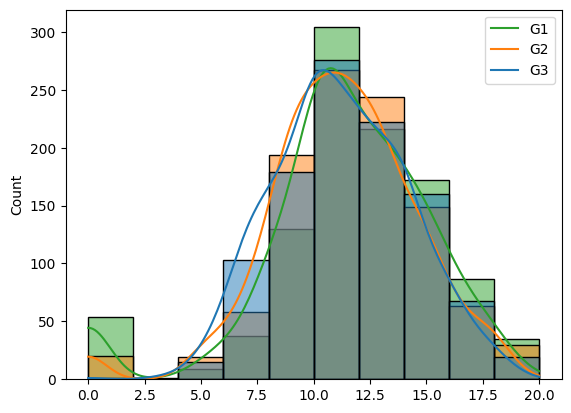

In [7]:
sns.histplot(combined_df[['G1', 'G2', 'G3']], kde=True, bins=10)
plt.legend(['G1', 'G2', 'G3'])
plt.show()


**<h1>Grade Distribution vs Gender**

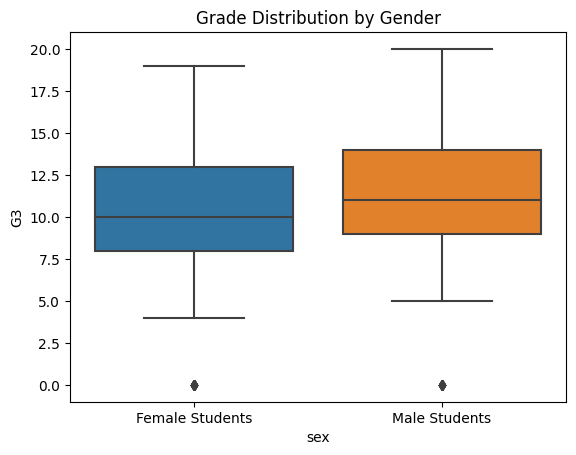

In [8]:
ax = sns.boxplot(x='sex', y='G3', data=df1)

ax.set_xticklabels(['Female Students', 'Male Students'])

plt.title('Grade Distribution by Gender')
plt.show()


**<h1>Urban & Rural vs Student Count**

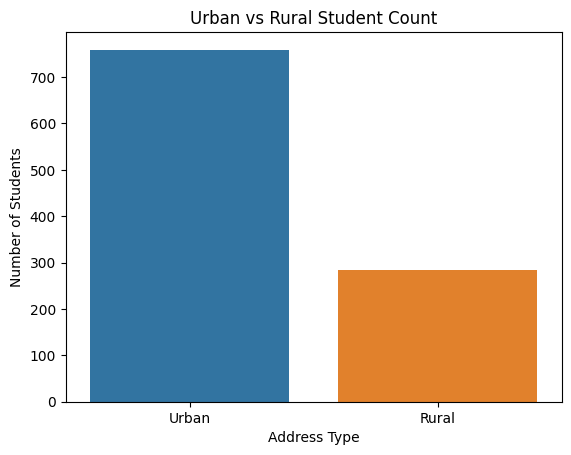

In [9]:
ax = sns.countplot(x='address', data=combined_df)
ax.set_xticklabels(["Urban", "Rural"])
plt.title("Urban vs Rural Student Count")
plt.xlabel("Address Type")
plt.ylabel("Number of Students")
plt.show()


**<h1>Study Time vs Final Grade**

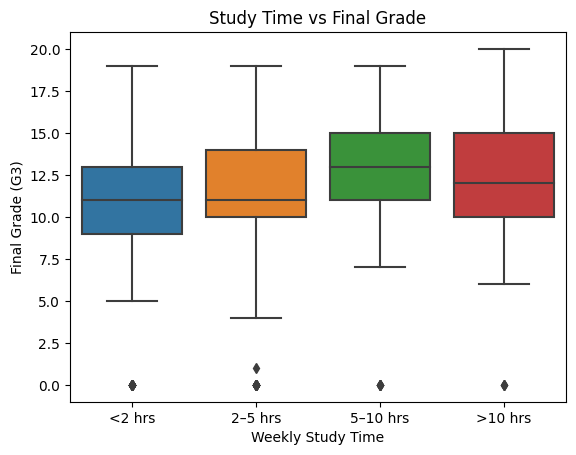

In [10]:
ax = sns.boxplot(x='studytime', y='G3', data=combined_df)
ax.set_xticklabels(["<2 hrs", "2–5 hrs", "5–10 hrs", ">10 hrs"])
plt.title("Study Time vs Final Grade")
plt.xlabel("Weekly Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()


**<h1>Absences vs Final Grade**

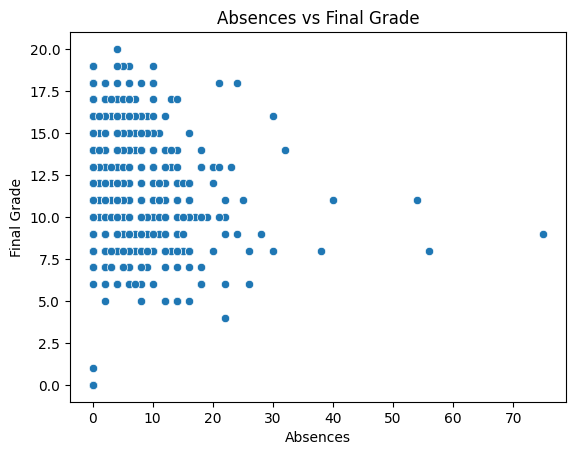

In [11]:
sns.scatterplot(x='absences', y='G3', data=combined_df)
plt.title("Absences vs Final Grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()


**<h2>TOTAL DISTINCT FINAL GRADES</h2>**

In [12]:
distinct_grades = combined_df['G3'].unique()
distinct_grades

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4,  1])

**<h1>CHECKING FOR NULL VALUES</h1>**

In [13]:
combined_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

THERE ARE ZERO MISSING VALUES IN THE DATABASE

**<h1>CHECKING FOR DUPLICATES</h1>**

In [14]:
duplicates = combined_df.duplicated()
combined_df[duplicates].sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: object

NO DUPLICATE ROWS PRESENT IN THE DATA. DATA IS CLEAN.

**<h1>DROPPING REDUNDANT COLUMNS(REDUNDANT FOR DATA ANALYSIS/MODEL)</h1>**

In [15]:
combined_df.drop(['school','activities','internet','reason','nursery'], axis=1, inplace=True)

**<h1>MAKE THE DATAFRAME INTEGRAL I.E. GIVING INTEGER LABELS TO STRINGS**

In [16]:
int_label = {'M':1, 'F':0, 'U':1, 'R':0, 'GT3':1,'LE3':0,'A':1,'T':0,'father':2,'mother':1, 'other':0,
              'course': 0 ,'home':1,'reputation':2, 'at_home':0, 'health':1, 'services':2,'teacher':4,'yes': 1, 'no': 0,}

combined_df = combined_df.replace(int_label)

**<h1>CHECKING WHETHER THE DATA IS CONVERTED TO INTEGER**

In [17]:
for col in combined_df.columns:
    print(col, ":", combined_df[col].dtype)


sex : int64
age : int64
address : int64
famsize : int64
Pstatus : int64
Medu : int64
Fedu : int64
Mjob : int64
Fjob : int64
guardian : int64
traveltime : int64
studytime : int64
failures : int64
schoolsup : int64
famsup : int64
paid : int64
higher : int64
romantic : int64
famrel : int64
freetime : int64
goout : int64
Dalc : int64
Walc : int64
health : int64
absences : int64
G1 : int64
G2 : int64
G3 : int64


In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         1044 non-null   int64
 1   age         1044 non-null   int64
 2   address     1044 non-null   int64
 3   famsize     1044 non-null   int64
 4   Pstatus     1044 non-null   int64
 5   Medu        1044 non-null   int64
 6   Fedu        1044 non-null   int64
 7   Mjob        1044 non-null   int64
 8   Fjob        1044 non-null   int64
 9   guardian    1044 non-null   int64
 10  traveltime  1044 non-null   int64
 11  studytime   1044 non-null   int64
 12  failures    1044 non-null   int64
 13  schoolsup   1044 non-null   int64
 14  famsup      1044 non-null   int64
 15  paid        1044 non-null   int64
 16  higher      1044 non-null   int64
 17  romantic    1044 non-null   int64
 18  famrel      1044 non-null   int64
 19  freetime    1044 non-null   int64
 20  goout       1044 non-null   in

**<h1>CHECKING FOR OUTLIERS</h2>**

In [19]:
means = combined_df.mean()
std_devs = combined_df.std()
z_scores = (combined_df - means) / std_devs
threshold = 4

outliers = combined_df[(z_scores.abs() > threshold).any(axis=1)]

print(f"Number of outliers: {len(outliers)}")
if not outliers.empty:
    print("\nIndices of outliers:")
    print(outliers.index.tolist())
    print("\nSample of outliers:")
    print(outliers.head())
else:
    print("No outliers detected.")

Number of outliers: 38

Indices of outliers:
[2, 18, 74, 78, 127, 144, 146, 149, 150, 153, 157, 164, 173, 183, 206, 247, 276, 280, 307, 315, 350, 392, 413, 473, 526, 564, 565, 574, 592, 607, 632, 674, 873, 938, 952, 963, 966, 1005]

Sample of outliers:
     sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  guardian  \
2      0   15        1        0        0     1     1     0     0         1   
18     1   17        1        1        0     3     2     2     2         1   
74     0   16        1        1        0     3     3     0     2         1   
78     1   17        1        1        0     2     1     0     0         1   
127    0   19        1        1        0     0     1     0     0         0   

     ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
2    ...       4         3      2     2     3       3        10   7   8  10  
18   ...       5         5      5     2     4       5        16   6   5   5  
74   ...       4         3      3     2     

**<h1>SCALING THE FEATURES</h1>**

In [20]:
features = combined_df.drop(columns='G3')
scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features)
processed_data = pd.DataFrame(normalized_features, columns=features.columns)
processed_data['G3'] = combined_df['G3']

**<h1>CHECKING FOR MISSING GRADES IN FINAL EXAM</h1>**

In [21]:
cnt=0
for i in processed_data['G3']:
    if(i==0):
        cnt+=1;
print("No. of rows where final grade is zero(missed exam)", cnt)

No. of rows where final grade is zero(missed exam) 53


In [22]:
processed_data = processed_data[processed_data['G3'] != 0]
#removing the rows where final grade of student is not given.

**<h1>CHECKING FOR NEGATIVE VALUES AFTER SCALING**

In [23]:
cnt=0
for col in processed_data.columns:
    for i in processed_data[col]:
        if(i<0):
            cnt+=1
cnt

0

**<h1>HOW THE DATA LOOKS LIKE AFTER PREPROCESSING</h1>**

In [24]:
processed_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.428571,1.0,1.0,1.0,1.00,1.00,0.00,1.0,0.5,...,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.263158,0.315789,6
1,0.0,0.285714,1.0,1.0,0.0,0.25,0.25,0.00,0.0,1.0,...,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.263158,0.263158,6
2,0.0,0.000000,1.0,0.0,0.0,0.25,0.25,0.00,0.0,0.5,...,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.368421,0.421053,10
3,0.0,0.000000,1.0,1.0,0.0,1.00,0.50,0.25,0.5,0.5,...,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.789474,0.736842,15
4,0.0,0.142857,1.0,1.0,0.0,0.75,0.75,0.00,0.0,1.0,...,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.315789,0.526316,10


**<h2>MODEL 1</h2>**

In [25]:
#Creating Training-Testing Sets (80-20)

X = processed_data.iloc[:, :-1].values
Y = processed_data.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [26]:
#MODEL ARCHITECTURE--------------------------------------------------------------------------------------------
model = Sequential()

# Input layer
model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(LayerNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.3))

# Hidden layer 1
model.add(Dense(32))
model.add(LayerNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))

# Hidden layer 2
model.add(Dense(16))
model.add(LayerNormalization())
model.add(LeakyReLU())

# Output layer
model.add(Dense(1, activation='linear'))

# Compile model for regression
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mae'])  # mean absolute error for interpretability

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 64)                  │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 16)                  │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model on the training set
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 87.2754 - mae: 8.6858 - val_loss: 36.2177 - val_mae: 5.3912
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.6812 - mae: 4.2906 - val_loss: 9.0342 - val_mae: 2.2794
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5904 - mae: 2.4207 - val_loss: 7.3412 - val_mae: 2.2724
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1216 - mae: 2.4612 - val_loss: 7.5330 - val_mae: 2.2114
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8560 - mae: 2.2613 - val_loss: 7.5068 - val_mae: 2.2090
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1707 - mae: 2.4716 - val_loss: 7.4137 - val_mae: 2.1992
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7798 - mae: 2.3981 - val_loss: 7.4046 - val_mae: 2.1973
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5344 - mae: 2.3567 - val_loss: 7.3028 - val_mae: 2.1842
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


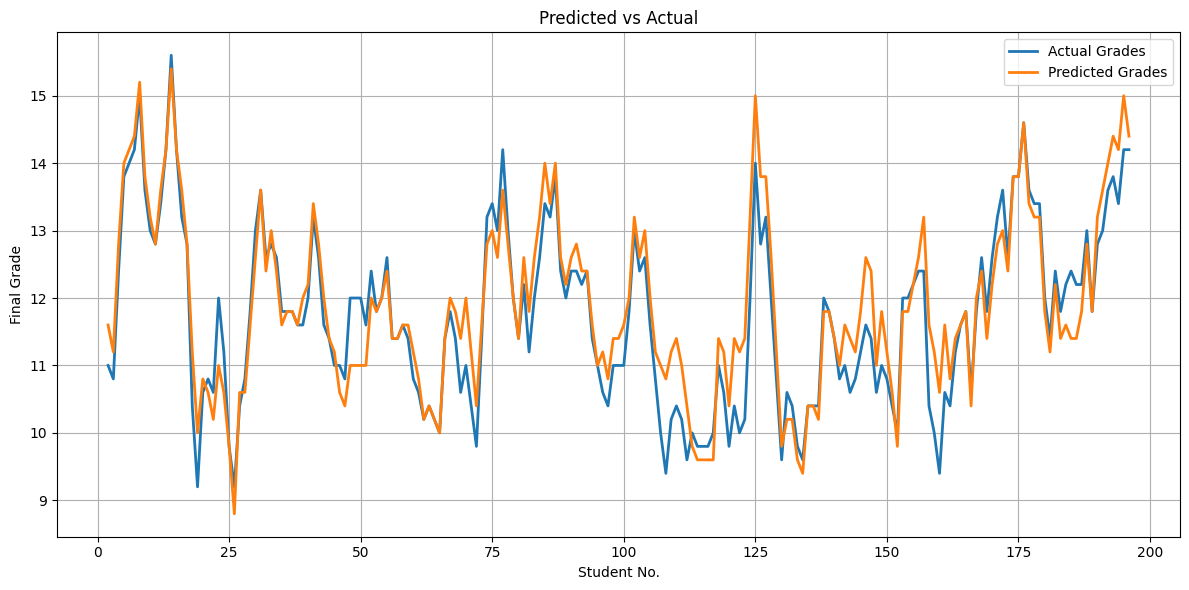

In [28]:
#The linear regressor outputs the values in the form of decimals... Rounding them off to integer
Y_pred = np.round(model.predict(X_test))

Y_pred = Y_pred.flatten()
Y_test = Y_test.flatten()

Y_pred = np.clip(Y_pred, 0, 20)

#PLOT THE RESULT(Predicted vs Actual)
y_pred_smooth = pd.Series(Y_pred).rolling(window=5, center=True).mean()
y_test_smooth = pd.Series(Y_test).rolling(window=5, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(y_test_smooth, label='Actual Grades', linewidth=2)
plt.plot(y_pred_smooth, label='Predicted Grades', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Student No.')
plt.ylabel('Final Grade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, mean_squared_error,
    mean_absolute_error, r2_score
)
from sklearn.preprocessing import label_binarize
import numpy as np

# Round predictions
Y_pred = np.round(Y_pred).astype(int)
Y_test = np.round(Y_test).astype(int)  

#Calculating the metrics
accuracy_m1 = accuracy_score(Y_test, Y_pred)
error_m1 = 1 - accuracy_m1

precision_m1 = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
recall_m1 = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
f1_m1 = f1_score(Y_test, Y_pred, average='macro', zero_division=0)

mse_m1 = mean_squared_error(Y_test, Y_pred)
mae_m1 = mean_absolute_error(Y_test, Y_pred)

r2_m1 = r2_score(Y_test, Y_pred)
n = len(Y_test)
p = X_test.shape[1]
adjusted_r2_m1 = 1 - (1 - r2_m1) * (n - 1) / (n - p - 1)

conf_matrix_m1 = confusion_matrix(Y_test, Y_pred)

#Printing All Metrics
print("Model 1 (Linear Output Layer) Metrics")
print(f"Accuracy           : {accuracy_m1:.4f}")
print(f"Error              : {error_m1:.4f}")
print(f"Precision          : {precision_m1:.4f}")
print(f"Recall             : {recall_m1:.4f}")
print(f"F1 Score           : {f1_m1:.4f}")
print(f"MSE                : {mse_m1:.4f}")
print(f"MAE                : {mae_m1:.4f}")
print(f"R-squared          : {r2_m1:.4f}")
print(f"Adjusted R-squared : {adjusted_r2_m1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_m1)

Model 1 (Linear Output Layer) Metrics
Accuracy           : 0.3970
Error              : 0.6030
Precision          : 0.2552
Recall             : 0.2686
F1 Score           : 0.2515
MSE                : 1.0402
MAE                : 0.7387
R-squared          : 0.8756
Adjusted R-squared : 0.8560

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  7  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  4  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  4 18  5  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 16  6  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  7  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2 10  9  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  7  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  3  8  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0

**<h2>MODEL 2</h2>**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format for softmax(creates 21 classes)
Y_train_softmax = to_categorical(Y_train, num_classes=21)
Y_test_softmax = to_categorical(Y_test, num_classes=21)

# Create the softmax-based model
softmax_model = Sequential()

#MODEL ARCHITECTURE--------------------------------------------------------------------------------------------

# Input layer
softmax_model.add(Dense(64, input_shape=(X_train.shape[1],)))
softmax_model.add(LayerNormalization())
softmax_model.add(LeakyReLU())
softmax_model.add(Dropout(0.3))

# Hidden layer 1
softmax_model.add(Dense(32))
softmax_model.add(LayerNormalization())
softmax_model.add(LeakyReLU())
softmax_model.add(Dropout(0.2))

# Hidden layer 2
softmax_model.add(Dense(16))
softmax_model.add(LayerNormalization())
softmax_model.add(LeakyReLU())

# Output layer
softmax_model.add(Dense(21, activation='softmax'))

# Compile the model
softmax_model.compile(optimizer=Adam(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Summary
softmax_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 64)                  │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 16)                  │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 21)                  │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,981 (19.46 KB)

 Trainable params: 4,981 (19.46 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model on the training set
softmax_model.fit(X_train, Y_train_softmax,
                  validation_split=0.2,
                  epochs=200,
                  batch_size=32,
                  verbose=1)


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0846 - loss: 2.9048 - val_accuracy: 0.2075 - val_loss: 2.4063
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1493 - loss: 2.4997 - val_accuracy: 0.1258 - val_loss: 2.4241
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1401 - loss: 2.5086 - val_accuracy: 0.1384 - val_loss: 2.4225
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1503 - loss: 2.4954 - val_accuracy: 0.1258 - val_loss: 2.4194
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1285 - loss: 2.4543 - val_accuracy: 0.1258 - val_loss: 2.3804
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1835 - loss: 2.3986 - val_accuracy: 0.1761 - val_loss: 2.3124
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1678 - loss: 2.3173 - val_accuracy: 0.2327 - val_loss: 2.1312
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2112 - loss: 2.2145 - val_accuracy: 0.1824 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


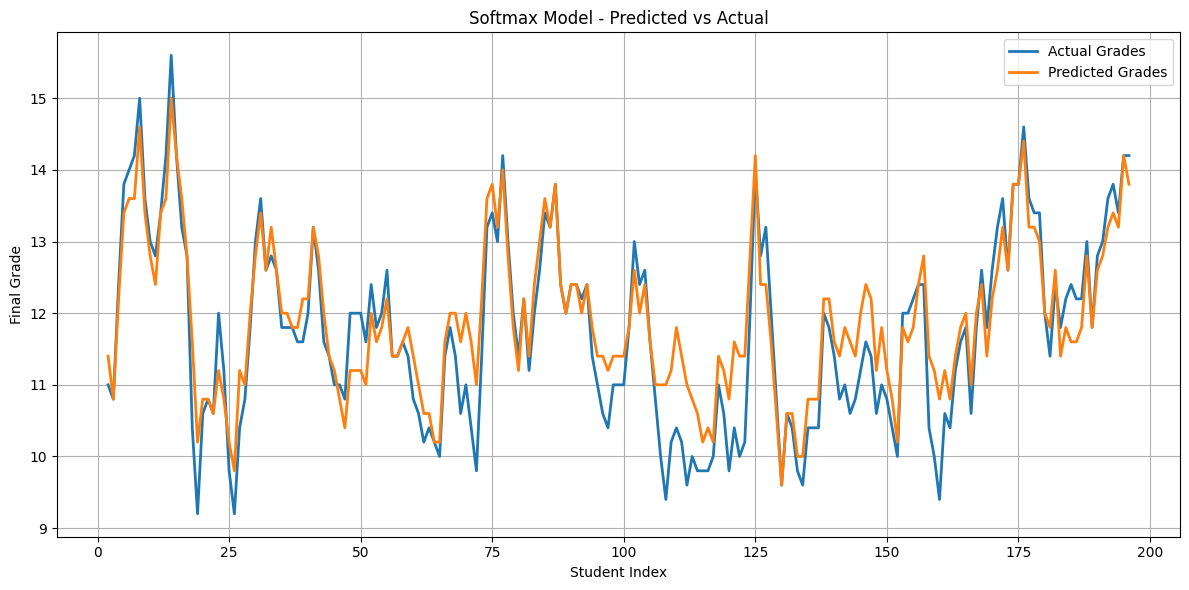

In [32]:
#Calculate the probabilities of each class
Y_pred_softmax = softmax_model.predict(X_test)
Y_pred_classes = []

#Sets the predicted class to the one having the highest probability
for i in Y_pred_softmax:
    Y_pred_classes.append(np.argmax(i))

y_pred_smooth = pd.Series(Y_pred_classes).rolling(window=5, center=True).mean()
y_test_smooth = pd.Series(Y_test).rolling(window=5, center=True).mean()

#Comparing results of the model
plt.figure(figsize=(12, 6))
plt.plot(y_test_smooth, label='Actual Grades', linewidth=2)
plt.plot(y_pred_smooth, label='Predicted Grades', linewidth=2)
plt.title('Softmax Model - Predicted vs Actual')
plt.xlabel('Student Index')
plt.ylabel('Final Grade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [33]:
# Calculating the Metrics
accuracy_m2 = accuracy_score(Y_test, Y_pred_classes)
error_m2 = 1 - accuracy_m2

precision_m2 = precision_score(Y_test, Y_pred_classes, average='macro', zero_division=0)
recall_m2 = recall_score(Y_test, Y_pred_classes, average='macro', zero_division=0)
f1_m2 = f1_score(Y_test, Y_pred_classes, average='macro', zero_division=0)

mse_m2 = mean_squared_error(Y_test, Y_pred_classes)
mae_m2 = mean_absolute_error(Y_test, Y_pred_classes)

r2_m2 = r2_score(Y_test, Y_pred_classes)
adjusted_r2_m2 = 1 - (1 - r2_m2) * (n - 1) / (n - p - 1)

conf_matrix_m2 = confusion_matrix(Y_test, Y_pred_classes)




#Plotting the metrics
print("Model 2 (Softmax Output Layer) Metrics")
print(f"Accuracy           : {accuracy_m2:.4f}")
print(f"Error              : {error_m2:.4f}")
print(f"Precision          : {precision_m2:.4f}")
print(f"Recall             : {recall_m2:.4f}")
print(f"F1 Score           : {f1_m2:.4f}")
print(f"MSE                : {mse_m2:.4f}")
print(f"MAE                : {mae_m2:.4f}")
print(f"R-squared          : {r2_m2:.4f}")
print(f"Adjusted R-squared : {adjusted_r2_m2:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_m2)


Model 2 (Softmax Output Layer) Metrics
Accuracy           : 0.3568
Error              : 0.6432
Precision          : 0.2558
Recall             : 0.2407
F1 Score           : 0.2415
MSE                : 1.2613
MAE                : 0.8191
R-squared          : 0.8492
Adjusted R-squared : 0.8254

Confusion Matrix:
[[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  5  6  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 11  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 19  8  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7 11 10  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  4 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  6 10  6  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  3  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  5 11  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  3  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  

**<h1>COMPARISION OF MODEL 1 & 2</h1>**

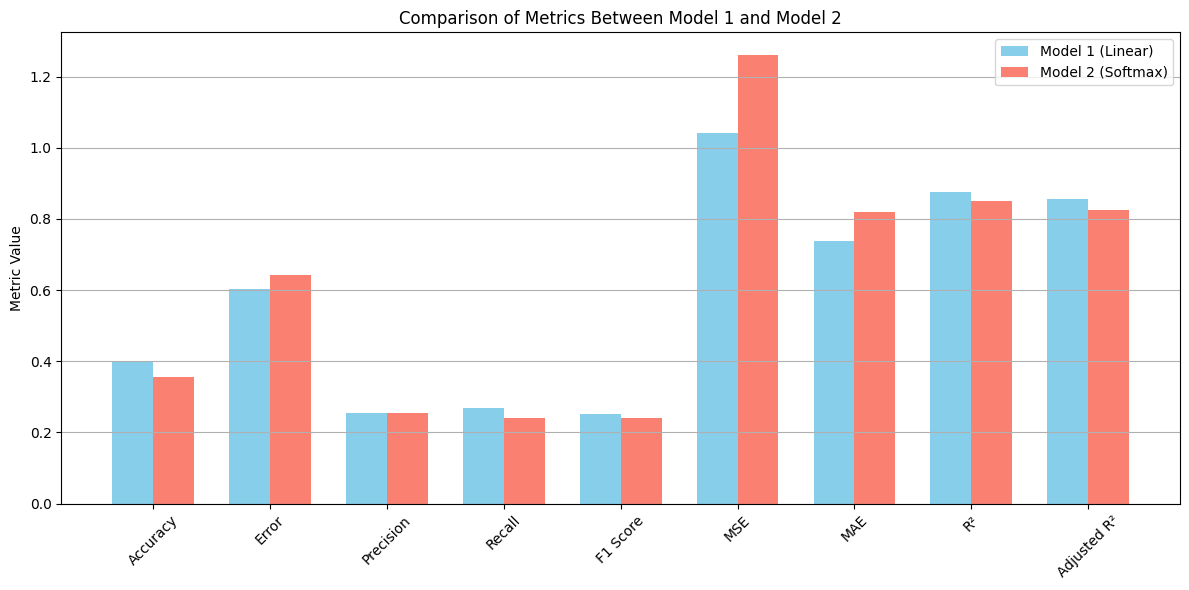

In [34]:
#BAR GRAPH DEPICTING COMPARISION OF THE TWO MODELS ON THE BASIS OF METRICS
metrics = ['Accuracy', 'Error', 'Precision', 'Recall', 'F1 Score', 'MSE', 'MAE', 'R²', 'Adjusted R²']
model1_values = [accuracy_m1, error_m1, precision_m1, recall_m1, f1_m1, mse_m1, mae_m1, r2_m1, adjusted_r2_m1]
model2_values = [accuracy_m2, error_m2, precision_m2, recall_m2, f1_m2, mse_m2, mae_m2, r2_m2, adjusted_r2_m2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, model1_values, width, label='Model 1 (Linear)', color='skyblue')
plt.bar(x + width/2, model2_values, width, label='Model 2 (Softmax)', color='salmon')

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Between Model 1 and Model 2')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
